In [79]:
# Bilbiotecas para auxílio na programação matemática
import math, sys 
import numpy as np
import sympy as sp

from scipy import sparse # Produção das diagonais das matrizes
from scipy.sparse import diags 

# Plotagem 2D e 3D
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm


from os import path # Suficiente para manipulação de arquivos
    
# Para solução exata
from scipy.special import hermite
from math import factorial

%matplotlib inline
count = 0

# Para otimização dos sistemas
from scipy import optimize

In [80]:
def N(n):
    return 1*1./np.sqrt(np.sqrt(np.pi)*2**n*factorial(n))

def psi(n, x):
    Hn=hermite(n)
    Px = N(n)*Hn(x)*np.exp(-0.5*x**2)
    return Px

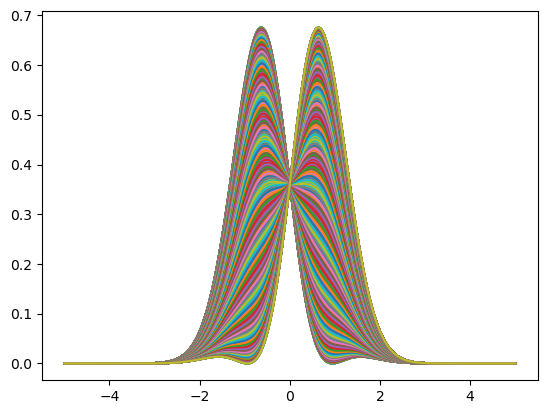

In [81]:
'''
Método de Crank-Nicolson para a solução da equação de Schrödinger em uma única dimensão
    ih * u_t = h_2/2m * u_xx + Vu

Com as condições de contorno não incluídas nessa etapa para que o controle preditivo faça as alterações
Com a equação inicial sendo decidida pelos polinômios de hermite de primeiro e segundo grau

u(x,0) = 0.80 * psi(0, x) + 0.60 * psi(1,x)

A interpretação foi ajustada a partir do código em python da Msc. Mirian Silva
'''

def CrankNicolson(M, O = 0, L = 1, T = 0.5):
    N = 1000 #São os pontos no intervalo de tempo
    
    #Pensando no poço quadrado infinito, temos essas duas limitações, onde L varia
    x0, xL = O, L

    P = 3.141111111111111111111111111
    #Discretização espacial
    dx = (xL - x0)/(P*M-1) 

    #Discretização temporal
    t0, tF = 0, T
    dt = (tF - t0)/(P*N-1)

    #Retorno dos números em um intervalo
    xs = np.linspace(x0, xL, M)
    ts = np.linspace(t0, tF, N)

    #Suponha um oscilador harmônico simples
    hbar = 1
    m = 1
    w = np.pi
    V = 1/2*m*w**2*xs**2

    #A partir da demonstração
    a = hbar/(4*m*dx**2) 
    b = 1j*hbar/dt - 2*a - 1/2*V
    c = 1j*hbar/dt + 2*a + 1/2*V

    #Obtenção da matriz
    ##Diagonais principais
    diagPrincipalA = b*np.ones((1,M)) #Cria uma matriz de 1's
    diagPrincipalB = c*np.ones((1,M))

    ##Diagonais secundárias, tem um tamanho a menos
    diagSecundariaA = a*np.ones((1,M-1))
    diagSecundariaB = (-a)*np.ones((1,M-1))

    diagonaisA = [diagPrincipalA, diagSecundariaA, diagSecundariaA]
    matrizA = sparse.diags(diagonaisA, [0, -1, 1], shape=(M,M)).toarray()
    
    diagonaisB = [diagPrincipalB, diagSecundariaB, diagSecundariaB]         
    matrizB = sparse.diags(diagonaisB, [0, -1, 1], shape=(M,M)).toarray()
    
    #Obtenção da matriz psi (Ela acumulará para o psi futuro)
    ps = np.zeros((M, N))
    psi_c = np.zeros((M, N))

    #Condição inicial
    ps[:,0] = 0.80 * psi(0, xs) + 0.60 * psi(1,xs) #A primeira coluna da matriz terá a equação inicial, em todas as posições
    psi_c = ps.astype(complex)
    #For para o acúmulo de resultados
    for k in range(1,N):
        b = np.matmul(matrizB, np.array(psi_c[0:M, k-1])) #Multiplicação de arrays já que houve uma conversão anterior
        psi_c[0:M, k] = np.linalg.solve(matrizA, b) #Matlab: x = A\b
        plt.plot(xs, np.absolute(psi_c[0:M, k])**2)
    return (psi_c, ts, xs)

psi, ts, xs = CrankNicolson(M = 1000, O = -5, L = 5, T = 10)

In [82]:
def psixt(n, x, t):
    Hn=hermite(n)
    a = complex(0,1)
    Pxt = N(n)*Hn(x)*np.exp(-0.5*x**2)*np.exp(-a*(n+1/2)*t*np.pi)
    return Pxt

In [83]:
# Solução buscada
Psi_d = 1/np.sqrt(2)*(psixt(0, xs, ts)+psixt(1, xs, ts))

In [84]:
len(Psi_d)

1000

In [85]:
len(psi)

1000

In [86]:
print(Psi_d[0:1000][0] - psi[0:1000][0])

[-2.38001362e-06+0.00000000e+00j -1.91989521e-05-1.28569064e-06j
 -3.71569084e-06+1.25707527e-06j -1.84020635e-05-1.84952268e-06j
 -4.36859739e-06+1.70338641e-06j -1.78205353e-05-2.26907149e-06j
 -4.86675444e-06+1.94179860e-06j -1.73625214e-05-2.61601102e-06j
 -5.29950467e-06+2.08131144e-06j -1.69909699e-05-2.91167776e-06j
 -5.69732661e-06+2.16691809e-06j -1.66836738e-05-3.16485245e-06j
 -6.07211420e-06+2.22191410e-06j -1.64248650e-05-3.38110046e-06j
 -6.42864160e-06+2.25891536e-06j -1.62030282e-05-3.56537136e-06j
 -6.76919910e-06+2.28460969e-06j -1.60100684e-05-3.72235945e-06j
 -7.09554787e-06+2.30252201e-06j -1.58406102e-05-3.85618419e-06j
 -7.40953975e-06+2.31474864e-06j -1.56912163e-05-3.97005470e-06j
 -7.71308785e-06+2.32294819e-06j -1.55596173e-05-4.06615958e-06j
 -8.00791341e-06+2.32877688e-06j -1.54440863e-05-4.14579310e-06j
 -8.29531521e-06+2.33396122e-06j -1.53430305e-05-4.20962254e-06j
 -8.57606595e-06+2.34019099e-06j -1.52547997e-05-4.25798262e-06j
 -8.85044081e-06+2.348972

In [91]:
print(psi[0][0])

(-9.636586081779871e-06+0j)


In [92]:
print(Psi_d[0])

(-1.2016599698530057e-05+0j)


In [14]:
vetor = []

In [129]:
# Crank-Nicholson simplificado

def CNS(N, M, psi_c, matrizA, matrizB,r):
    for k in range(r,N):
        b = np.matmul(matrizB, np.array(psi_c[0:M, k-1])) #Multiplicação de arrays já que houve uma conversão anterior
        psi_c[0:M, k] = np.linalg.solve(matrizA, b) #Matlab: x = A\b
        plt.plot(xs, np.absolute(psi_c[0:M, k])**2)
    return psi_c

def N(n):
    return 1*1./np.sqrt(np.sqrt(np.pi)*2**n*factorial(n))

def psi(n, x):
    Hn=hermite(n)*psi_c[0][u]
    Px = N(n)*Hn(x)*np.exp(-0.5*x**2)
    return Px

def ut(a,b,x):
    return a-b+x

(-1.2016599698530057e-05+0j)


TypeError: 'numpy.ndarray' object is not callable

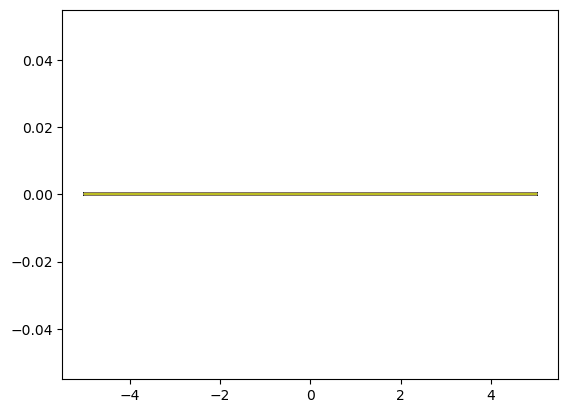

In [130]:
import sympy as sp
from sympy.abc import x, y, z, a, t

#Obtenção da matriz psi (Ela acumulará para o psi futuro)
ps = np.zeros((1000, 1000))
psi_c = np.zeros((1000, 1000))
xs = np.linspace(-5, 5, 1000)

#Condição inicial
ps[:,0] = 0.80 * psi(0, xs) + 0.60 * psi(1,xs) #A primeira coluna da matriz terá a equação inicial, em todas as posições
psi_c = ps.astype(complex)

for i in np.arange(0, 3, 1):

    t = sp.var('t',real=True);

    N = 1000 #São os pontos no intervalo de tempo
    M = 1000
    #Pensando no poço quadrado infinito, temos essas duas limitações, onde L varia
    x0, xL = -5, 5

    P = 3.141111111111111111111111111
    #Discretização espacial
    dx = (xL - x0)/(P*M-1) 

    #Discretização temporal
    t0, tF = 0, 10
    dt = (tF - t0)/(P*N-1)

    #Retorno dos números em um intervalo
    xs = np.linspace(x0, xL, M)
    ts = np.linspace(t0, tF, N)

    #Suponha um oscilador harmônico simples
    hbar = 1
    m = 1
    w = np.pi
    V = 1/2*m*w**2*xs**2

    #A partir da demonstração
    a = hbar/(4*m*dx**2) 
    b = 1j*hbar/dt - 2*a - 1/2*V
    c = 1j*hbar/dt + 2*a + 1/2*V

    #Obtenção da matriz
    ##Diagonais principais
    diagPrincipalA = b*np.ones((1,M)) #Cria uma matriz de 1's
    diagPrincipalB = c*np.ones((1,M))

    ##Diagonais secundárias, tem um tamanho a menos
    diagSecundariaA = a*np.ones((1,M-1))
    diagSecundariaB = (-a)*np.ones((1,M-1))

    diagonaisA = [diagPrincipalA, diagSecundariaA, diagSecundariaA]
    matrizA = sparse.diags(diagonaisA, [0, -1, 1], shape=(M,M)).toarray()

    diagonaisB = [diagPrincipalB, diagSecundariaB, diagSecundariaB]         
    matrizB = sparse.diags(diagonaisB, [0, -1, 1], shape=(M,M)).toarray()
    
    psi_c = CNS(N, M, psi_c, matrizA, matrizB, i+1)
    
    for u in range(i+5):
        print(Psi_d[u] - psi_c[0][u])
        print(optimize.fmin(ut(Psi_d[u], psi_c[0][u], xs), 1))
    

In [22]:
diagPrincipalA = np.ones((2,9))
print(diagPrincipalA)

[[1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1.]]


In [144]:
diagPrincipalA = np.ones((1,5)) #Cria uma matriz de 1's
diagPrincipalB = 2*np.ones((1,5))
##Diagonais secundárias, tem um tamanho a menos

diagSecundariaA = a*np.ones((1,5-1))
diagSecundariaB = (-a)*np.ones((1,5-1))

diagonaisA = [diagPrincipalA, diagSecundariaA, diagSecundariaA]
matrizA = sparse.diags(diagonaisA, [0, -1, 1], shape=(5,5)).toarray()

print(matrizA.round(2))
len(matrizA)
print(matrizA[2][2])

[[1.000000e+00 2.465074e+04 0.000000e+00 0.000000e+00 0.000000e+00]
 [2.465074e+04 1.000000e+00 2.465074e+04 0.000000e+00 0.000000e+00]
 [0.000000e+00 2.465074e+04 1.000000e+00 2.465074e+04 0.000000e+00]
 [0.000000e+00 0.000000e+00 2.465074e+04 1.000000e+00 2.465074e+04]
 [0.000000e+00 0.000000e+00 0.000000e+00 2.465074e+04 1.000000e+00]]
1.0


In [154]:
def f(x):
    N = 1000 #São os pontos no intervalo de tempo
    M = 1000
    #Pensando no poço quadrado infinito, temos essas duas limitações, onde L varia
    x0, xL = -5, 5

    P = 3.141111111111111111111111111
    #Discretização espacial
    dx = (xL - x0)/(P*M-1) 

    #Discretização temporal
    t0, tF = 0, 10
    dt = (tF - t0)/(P*N-1)

    #Retorno dos números em um intervalo
    xs = np.linspace(x0, xL, M)
    ts = np.linspace(t0, tF, N)

    #Suponha um oscilador harmônico simples
    hbar = 1
    m = 1
    w = np.pi
    V = 1/2*m*w**2*xs**2

    #A partir da demonstração
    a = hbar/(4*m*dx**2) 
    b = 1j*hbar/dt - 2*a - 1/2*V
    c = 1j*hbar/dt + 2*a + 1/2*V

    #Obtenção da matriz
    ##Diagonais principais
    diagPrincipalA = b*np.ones((1,M)) #Cria uma matriz de 1's
    diagPrincipalB = c*np.ones((1,M))

    ##Diagonais secundárias, tem um tamanho a menos
    diagSecundariaA = a*np.ones((1,M-1))
    diagSecundariaB = (-a)*np.ones((1,M-1))

    diagonaisA = [diagPrincipalA, diagSecundariaA, diagSecundariaA]
    matrizA = sparse.diags(diagonaisA, [0, -1, 1], shape=(M,M)).toarray()

    diagonaisB = [diagPrincipalB, diagSecundariaB, diagSecundariaB]         
    matrizB = sparse.diags(diagonaisB, [0, -1, 1], shape=(M,M)).toarray()
       
    psi_d = CNS(N, M, psi_c, matrizA, matrizB, 0)

    a = Psi_d[0]
    b = psi_d[0][0]
    return  -1.2016599698530057e-05 + x**2

KeyboardInterrupt: 

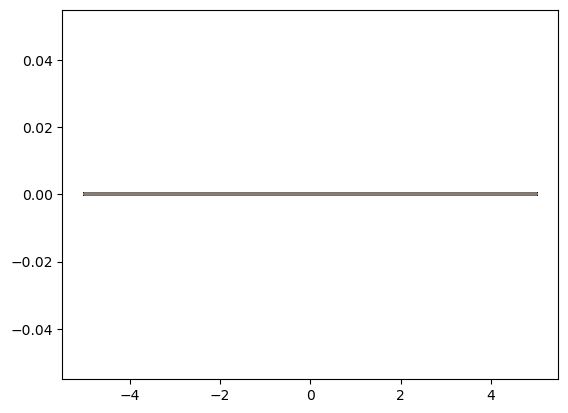

In [155]:
minimum = optimize.fmin(f, 1)